> Öğrenci adı    : Abdullah JAMOUS
------
> Öğrenci Numara : 225B5001
------
> Ders adı       : Makine Öğrenmesi
------
> Ders Öğretmeni : Prof.Dr. Mine Elif KARSLIGİL YAVUZ
---
> Proje Konusu   : Alışveriş müşteri veri analizi

# **Veri Analizi**


## *Veri Setinin Tanımı:*

---



Bu veri seti, 4'ü doğrusal değerli ve biri kategorik olan 5 öznitelik içerir.

Bu veri seti, yalnızca pazar sepeti analizi olarak da bilinen müşteri segmentasyonu kavramlarını öğrenmek amacıyla oluşturulmuştur. Bunu en basit haliyle denetimsiz ML tekniğini (KMeans Clustering Algorithm) kullanarak göstereceğim.


## *Veri Setinin İçeriği*

---



Veri örnek sayısı: 200 
Öznitelik sayısı: 5

Bir süpermarket alışveriş merkezine borcunuz var ve üyelik kartlarınız aracılığıyla Müşteri Kimliği, yaş, cinsiyet, yıllık gelir ve harcama puanı gibi müşterilerinize ilişkin bazı temel bilgilere sahipsiniz.
Harcama Puanı, müşteri davranışı ve satın alma verileri gibi tanımladığınız parametrelere göre müşteriye atadığınız bir şeydir.

### Öznitelik Bilgileri:

---



**Klinik Öznitelikler: (0, 1, 2, 3) değerlerini alır**

*   1: erythema
*   2: scaling
*   3: definite borders
*   4: itching
*   5: koebner phenomenon
*   6: polygonal papules
*   7: follicular papules
*   8: oral mucosal involvement
*   9: knee and elbow involvement
*   10: scalp involvement
*   11: family history, (0 veya 1)
*   34: Age (linear)

**Histopatolojik Öznitelikler: (0, 1, 2, 3) değerlerini alır**
*   12: melanin incontinence
*   13: eosinophils in the infiltrate
*   14: PNL infiltrate
*   15: fibrosis of the papillary dermis
*   16: exocytosis
*   17: acanthosis
*   18: hyperkeratosis
*   19: parakeratosis
*   20: clubbing of the rete ridges
*   21: elongation of the rete ridges
*   22: thinning of the suprapapillary epidermis
*   23: spongiform pustule
*   24: munro microabcess
*   25: focal hypergranulosis
*   26: disappearance of the granular layer
*   27: vacuolisation and damage of basal layer
*   28: spongiosis
*   29: saw-tooth appearance of retes
*   30: follicular horn plug
*   31: perifollicular parakeratosis
*   32: inflammatory monoluclear inflitrate
*   33: band-like infiltrate


**Sınıf Bilgisi: (1,2,3,4,5,6) değerlerini alır**
*   35 : class code

## *Data üzerinde işlem yapması*

---



### Dataseti çağırmak

---



In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Mall_Customers.csv")
print("Veri seti örneği:")
df

Veri seti örneği:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Eksik veri kontrolu ve tamamlanması

---



Sonucu False çıkmasına göre eksik veri bulunmadığı görüyoruz

In [3]:
df.isnull().values.any()

False

### Kullanılmayacak özellikleri çıkarma

CustomerID özelliği kullanılmayacak, be nedenle datasetinden çıkardım

In [4]:
df = df.drop(['CustomerID'], axis =1)

### Değeri sayı olmayan özellikleri sayıya dönüştürme 

---



Datasetimizde sadece Gender özelliği sayısal değerlere dönüştürüyoruz

Erkek: 0 - kadın: 1

In [5]:
dummy = pd.get_dummies(df['Gender'])
df2 = pd.concat((df , dummy), axis =1)
df2 = df2.drop(['Gender'], axis =1)
df2 = df2.drop(['Male'], axis =1)
df2 = df2.rename(columns={"Female":"Gender"})
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


### Özelliklerin değerlerini normalize etmek

In [15]:
from sklearn import preprocessing
df3 = df2.drop(['Gender'], axis =1)
d = preprocessing.normalize(df3, axis=0)
scaled_df = pd.DataFrame(d ,columns=df3.columns )
df = pd.concat((scaled_df , df2["Gender"]), axis =1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,0.032551,0.016074,0.048876,0
1,0.035978,0.016074,0.101511,0
2,0.034265,0.017146,0.007519,1
3,0.039404,0.017146,0.096498,1
4,0.053110,0.018218,0.050129,1


# **Heatmap**

In [33]:
import seaborn as sns

correlasion = df2.corr()

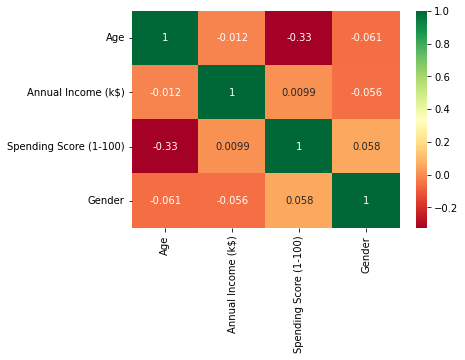

In [34]:
sns.heatmap(correlasion, cmap="RdYlGn", annot=True)

# **Kümeleme**

### Gender ile Speending Score K-means uygulama 

---



In [38]:
df_temp = df2.iloc[:, [2,3]].values

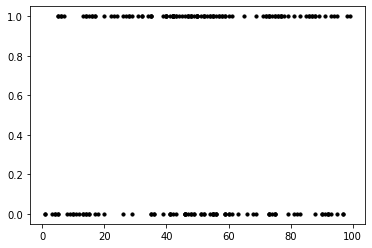

In [39]:
import matplotlib.pyplot as plt

plt.scatter(x=df_temp[:,0], y=df_temp[:,1], s=10, c='black')
plt.show()

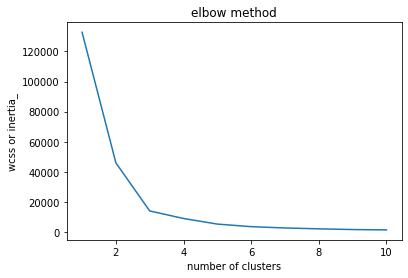

In [40]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  model = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init= 10)
  model.fit_predict(df_temp)
  wcss.append(model.inertia_)  #inertia_ = wcss

plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss or inertia_')
plt.show()

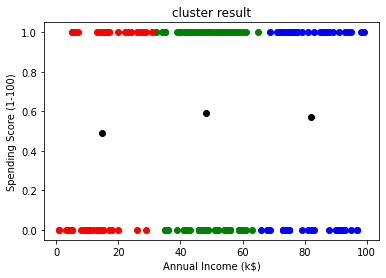

In [41]:
model = KMeans(n_clusters= 3, init='k-means++', max_iter=300, n_init= 10)
labels = model.fit_predict(df_temp) # har sample ozve kodam cluster ast
np.unique(labels)
plt.scatter(x=df_temp[labels==0,0], y=df_temp[labels==0,1], c='green') # df haye ke labels anha az cluster 0 bashand va sootoone 0 va sootoone 1 df (df do sootoon darad kolan)
plt.scatter(x=df_temp[labels==1,0], y=df_temp[labels==1,1], c='blue')
plt.scatter(x=df_temp[labels==2,0], y=df_temp[labels==2,1], c='red')
plt.scatter(x=df_temp[labels==3,0], y=df_temp[labels==3,1], c='pink')
plt.scatter(x=df_temp[labels==4,0], y=df_temp[labels==4,1], c='yellow')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='black')

plt.title('cluster result')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Annual Income ile Speending Score K-means uygulama

---



In [42]:
df_temp = df2.iloc[:, [1,2]].values

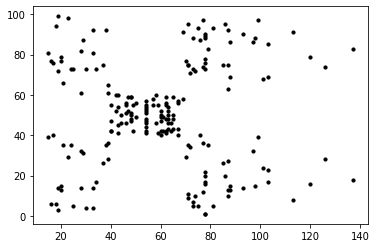

In [43]:
import matplotlib.pyplot as plt

plt.scatter(x=df_temp[:,0], y=df_temp[:,1], s=10, c='black')
plt.show()

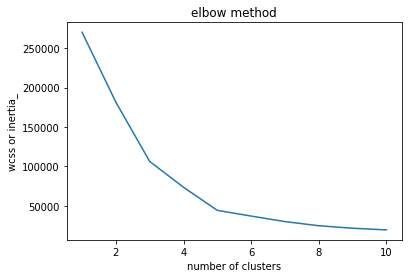

In [44]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  model = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init= 10)
  model.fit_predict(df_temp)
  wcss.append(model.inertia_)  #inertia_ = wcss

plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss or inertia_')
plt.show()

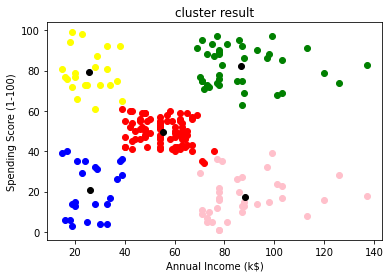

In [47]:
model = KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init= 10)
labels = model.fit_predict(df_temp) # har sample ozve kodam cluster ast
np.unique(labels)
plt.scatter(x=df_temp[labels==0,0], y=df_temp[labels==0,1], c='green') # df haye ke labels anha az cluster 0 bashand va sootoone 0 va sootoone 1 df (df do sootoon darad kolan)
plt.scatter(x=df_temp[labels==1,0], y=df_temp[labels==1,1], c='blue')
plt.scatter(x=df_temp[labels==2,0], y=df_temp[labels==2,1], c='red')
plt.scatter(x=df_temp[labels==3,0], y=df_temp[labels==3,1], c='pink')
plt.scatter(x=df_temp[labels==4,0], y=df_temp[labels==4,1], c='yellow')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='black')

plt.title('cluster result')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()